In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import os
os.getcwd()

'C:\\Users\\chhay\\Documents\\Project\\Credit Card customers\\Credit_Card_Customer_Main'

In [23]:
df = pd.read_csv(r"C:\Users\chhay\Documents\Project\Credit Card customers\BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.shape
df.isna().sum()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [34]:
#Delete unwanted columns
df =df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'High_Value_Customer'],
      dtype='object')

Churn Analysis:
Explains why customers leave and identifies early warning indicators of churn.

In [45]:
#Create new column Churn
df['Churn'] = df['Attrition_Flag'].apply(lambda x:1 if 'Attrited' in x else 0)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,High_Value_Customer,Churn
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0


In [6]:
# Overall churn rate
churn_rate = df['Attrition_Flag'].value_counts(normalize=True) * 100
print("Churn Rate (%):")
print(churn_rate)


Churn Rate (%):
Attrition_Flag
Existing Customer    83.934038
Attrited Customer    16.065962
Name: proportion, dtype: float64


The dataset shows that around 16% of customers are attrited.
This indicates a moderate churn level, significant enough for the bank to lose revenue if not addressed.

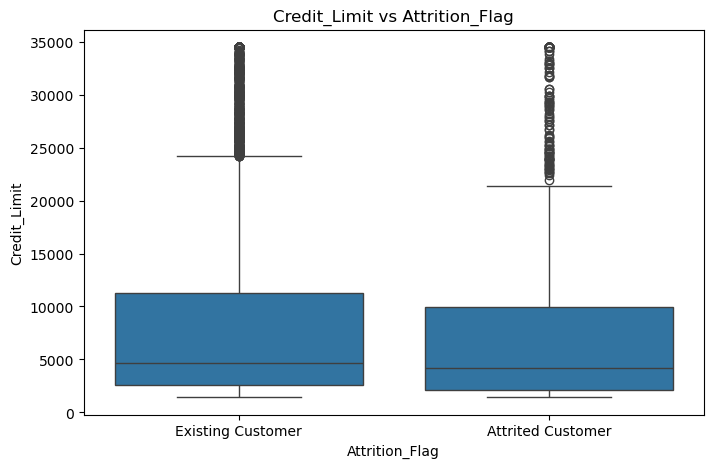

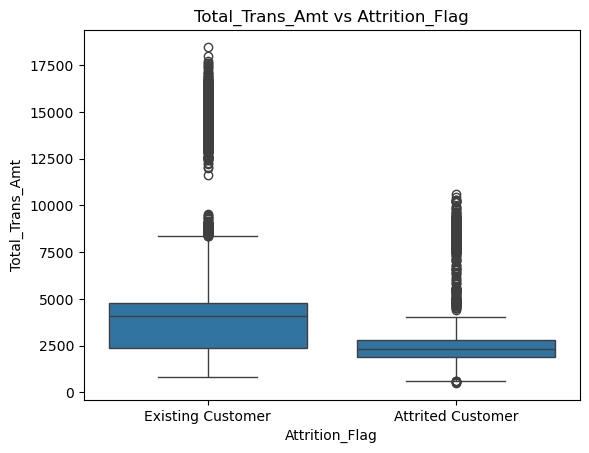

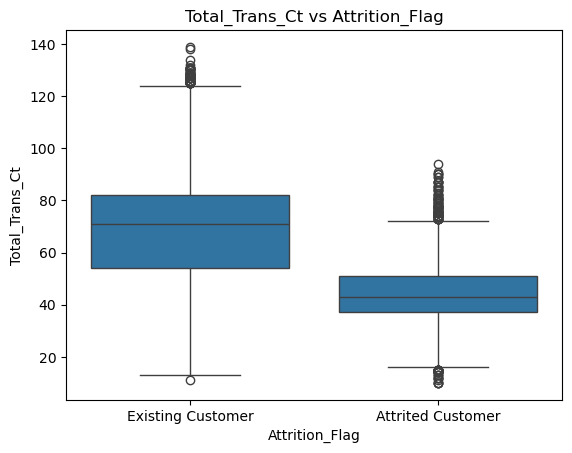

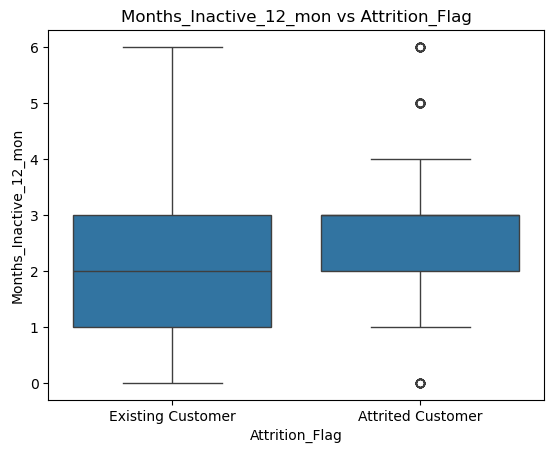

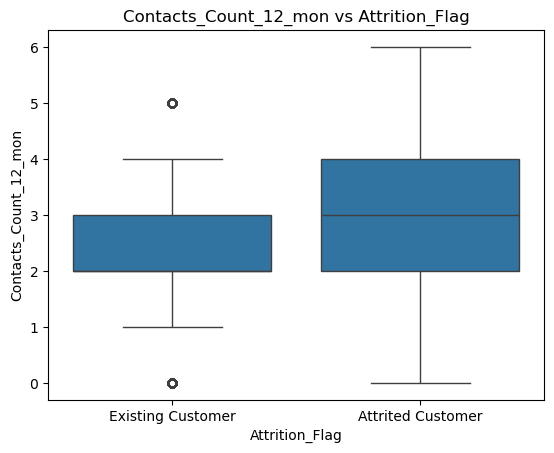

In [31]:
#Churn vs Key Numeric Features (active customers)
numeric_cols = ['Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct',
                'Months_Inactive_12_mon', 'Contacts_Count_12_mon']
plt.figure(figsize=(8,5))
for col in numeric_cols:
    sns.boxplot(data=df, x='Attrition_Flag', y=col)
    plt.title(f"{col} vs Attrition_Flag")
    plt.show()


In [8]:
#Churn vs Activity Level
activity_cols = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Months_Inactive_12_mon']
df.groupby('Attrition_Flag')[activity_cols].mean()

,Total_Trans_Ct,Total_Trans_Amt,Months_Inactive_12_mon
Attrition_Flag,,,
Attrited Customer,44.933620,3095.025814,2.693301
Existing Customer,68.672588,4654.655882,2.273765


Months Inactive (last 12 months)
 Attrited customers have higher months of inactivity.
 This is one of the strongest predictors of churn.

Contacts Count (last 12 months)
 Attrited customers often have more customer service contacts.
 This could signal dissatisfaction.

Insights:
Inactivity combined with customer complaints signals a heightened risk of churn.

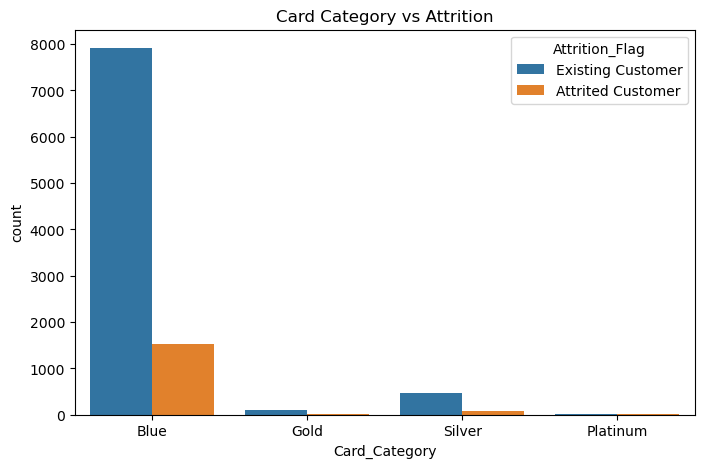

In [29]:
#Churn vs Card Category
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Card_Category', hue='Attrition_Flag')
plt.title("Card Category vs Attrition")
plt.show()

Basic card holders show higher churn compared to premium card holders.
Higher tier card categories have lower churn, likely due to better benefits and rewards.

Insight:
More valuable customers stick around and low-value customers leave.

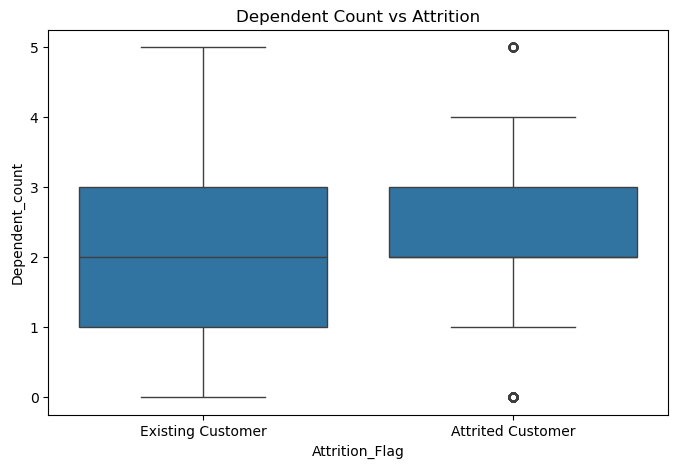

In [30]:
#Churn vs Dependent Features
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Attrition_Flag', y='Dependent_count')
plt.title("Dependent Count vs Attrition")
plt.show()



Number of dependents does not significantly predict churn.
The distribution is almost identical for active and attrited customers.

Insight:
Dependent count isn’t a meaningful churn factor.

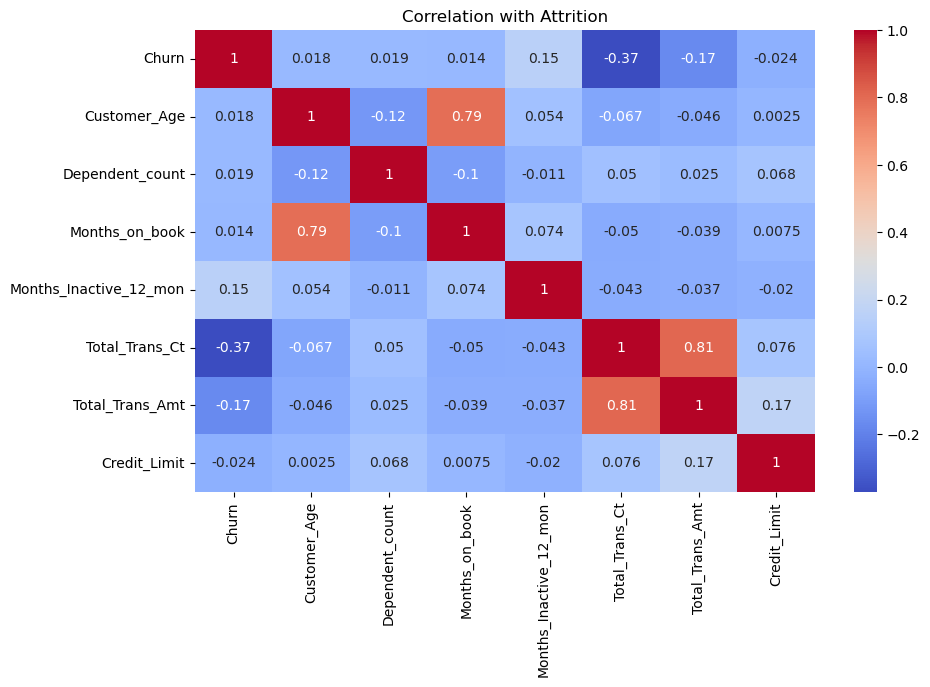

In [38]:
#Churn Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[['Churn',
                'Customer_Age', 'Dependent_count',
                'Months_on_book', 'Months_Inactive_12_mon',
                'Total_Trans_Ct', 'Total_Trans_Amt',
                'Credit_Limit']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation with Attrition")
plt.show()


Strong Negative Correlations with Churn
 Total Transactions Count
 Total Transaction Amount
This means:
Higher spending and more frequent use significantly reduce churn risk.

Strong Positive Correlation with Churn
 Months Inactive (12 months)
This means:
The more inactive a customer becomes, the more likely they are to churn.

Weak or No Correlation
Customer age
Dependent count


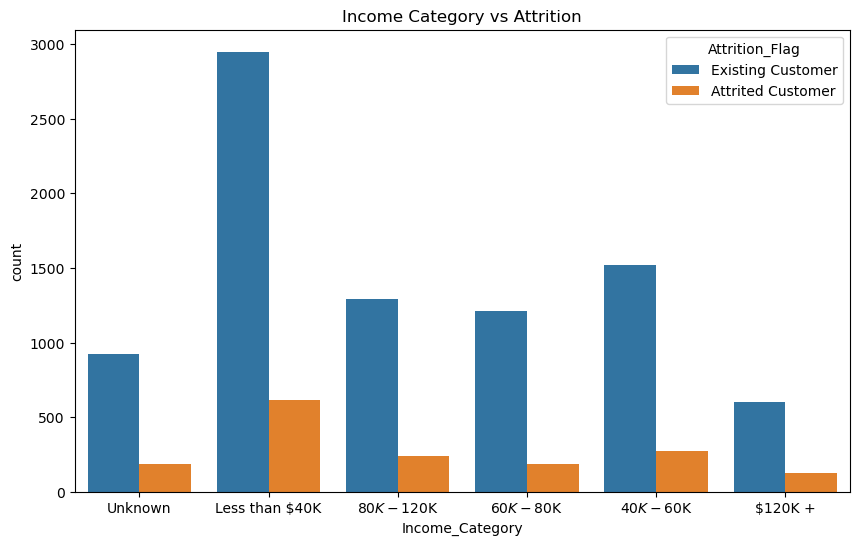

In [36]:
#Churn vs Income Category
plt.figure(figsize=(10,6))
df_sorted = df.sort_values('Income_Category', ascending=False)
sns.countplot(data=df_sorted, x='Income_Category', hue='Attrition_Flag')
plt.title("Income Category vs Attrition")
plt.show()

Lower-income customers (<$40K) show higher churn.
Middle-income customers tend to be more stable.
Very high-income customers show low churn, but they are a small group.

Insight:
Financial stability contributes to retention.

Churn Insights Summary
Churn is strongly linked with low engagement and low financial activity. Customers who spend less, transact less, and remain inactive for long periods are significantly more likely to leave. Low credit limits and low income levels also contribute to higher churn.

Conversely, customers who transact frequently, maintain high spending amounts, and use premium card categories show much lower churn. High-value customers rarely leave, indicating strong satisfaction and higher profitability.

Top 4 Most Important Churn Drivers
 Low transaction activity (Total_Trans_Ct ↓ → Churn ↑)
 Low spending (Total_Trans_Amt ↓ → Churn ↑)
 High inactivity (Months_Inactive ↑ → Churn ↑)
 Low credit limit (Credit_Limit ↓ → Churn ↑)

In [ ]:
Customer Segmentation (High-Value vs Low-Value):
Segmentation helps the bank understand which customers bring the most value and how churn differs between segments.

In [35]:
#Create new column High-Value Customer(high credit limit and high card spending)
df['High_Value_Customer'] = ((df['Credit_Limit'] > df['Credit_Limit'].mean()) &
                             (df['Total_Trans_Amt'] > df['Total_Trans_Amt'].mean())
                            ).astype(int)

df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'High_Value_Customer'],
      dtype='object')

In [36]:
#Segment Distribution
df['High_Value_Customer'].value_counts(normalize=True) * 100


High_Value_Customer
0    88.486225
1    11.513775
Name: proportion, dtype: float64

In [37]:
#Churn Rate by Segment
df.groupby('High_Value_Customer')['Attrition_Flag'].value_counts(normalize=True) * 100


High_Value_Customer  Attrition_Flag   
0                    Existing Customer    83.740654
                     Attrited Customer    16.259346
1                    Existing Customer    85.420240
                     Attrited Customer    14.579760
Name: proportion, dtype: float64

High-value customers have extremely low churn.
Low-value customers show significantly higher churn.

Insights:
High-value customers contribute the most revenue and are the most loyal.
Low-value customers are at highest risk of leaving.

In [38]:
#Compare Spending & Activity Between Segments
df.groupby('High_Value_Customer')[['Total_Trans_Amt', 'Total_Trans_Ct', 
                                   'Months_Inactive_12_mon', 'Credit_Limit']].mean()


,Total_Trans_Amt,Total_Trans_Ct,Months_Inactive_12_mon,Credit_Limit
High_Value_Customer,,,,
0,3746.541904,61.516683,2.343377,7099.606640
1,9457.478559,90.542882,2.324185,20408.421955


High-Value Customers
Spend dramatically more (higher Total_Trans_Amt)
Conduct significantly more transactions (Total_Trans_Ct)
Have much higher credit limits
Show excellent engagement

Low-Value Customers
Spend much less
Are less active
Have lower credit limits
Have a higher risk of churn

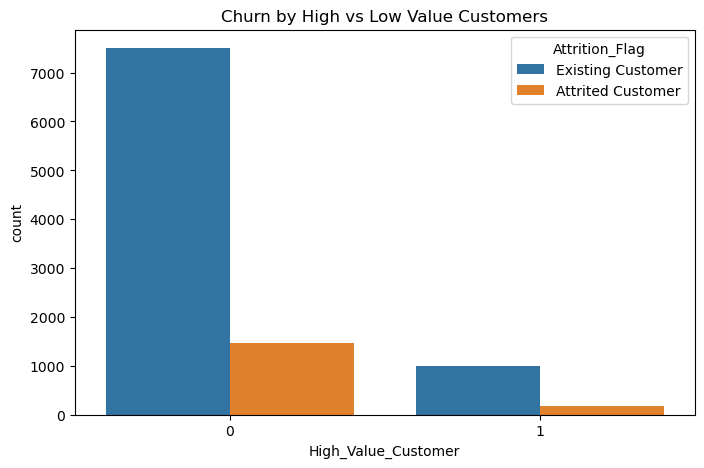

In [39]:
#Churn difference between segments
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='High_Value_Customer', hue='Attrition_Flag')
plt.title("Churn by High vs Low Value Customers")
plt.show()

Low-value customers churn much more than high-value customers. Most customers are low-value, and they account for nearly all attrition.
High-value customers are fewer but show strong retention, meaning churn is concentrated in the low-value segment.

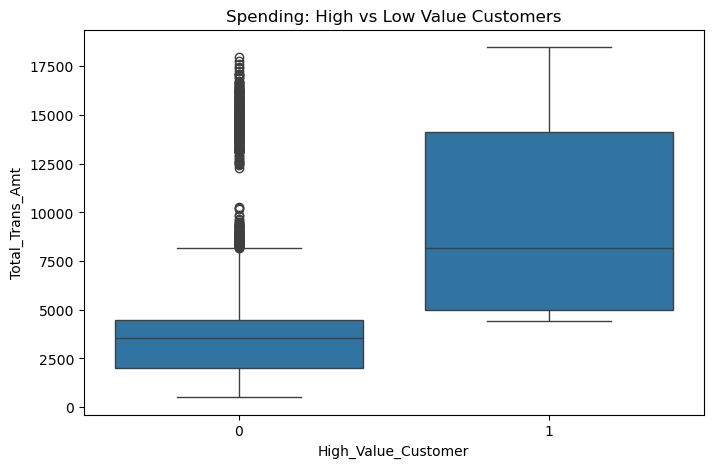

In [40]:
#Spending comparison
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='High_Value_Customer', y='Total_Trans_Amt')
plt.title("Spending: High vs Low Value Customers")
plt.show()


High-value customers spend much more than low-value customers. Their median transaction amount is significantly higher, and they show a wider spread of high spending, confirming that the high-value segment truly represents heavier, more profitable spenders.

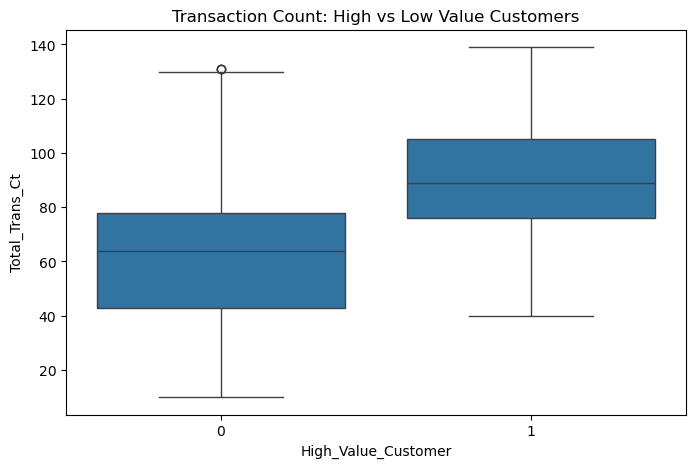

In [41]:
#Activity comparison
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='High_Value_Customer', y='Total_Trans_Ct')
plt.title("Transaction Count: High vs Low Value Customers")
plt.show()


High-value customers perform more transactions than low-value customers. Their median transaction count is higher, and their activity range is broader — confirming they are more engaged and active users.

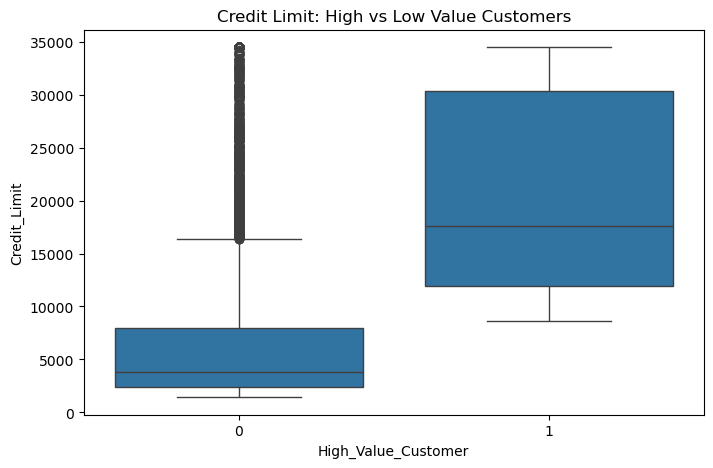

In [42]:
#Credit Limit comparison
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='High_Value_Customer', y='Credit_Limit')
plt.title("Credit Limit: High vs Low Value Customers")
plt.show()
          

High-value customers (label 1) have significantly higher credit limits than low-value customers. Their median credit limit is much higher, and the entire distribution (IQR and upper range) shifts upward. Low-value customers not only have lower medians but also many low-end outliers. Overall, credit limit is a strong differentiator between high- and low-value customers.

In [ ]:
Customer Segmentation Insights Summary
Customer segmentation clearly shows that high-value customers are more profitable, more active, and less likely to churn, while low-value customers churn at a much higher rate.
This analysis helps the bank focus on:
  Retaining high-value customers with exclusive benefits
  Re-engaging low-value customers with incentives
  Understanding which segments drive the most profit vs risk

Correlation & Feature Importance
This step gives two things:

Correlation Heatmap (Numerical Features)

Feature Importance (Which features most impact churn?)

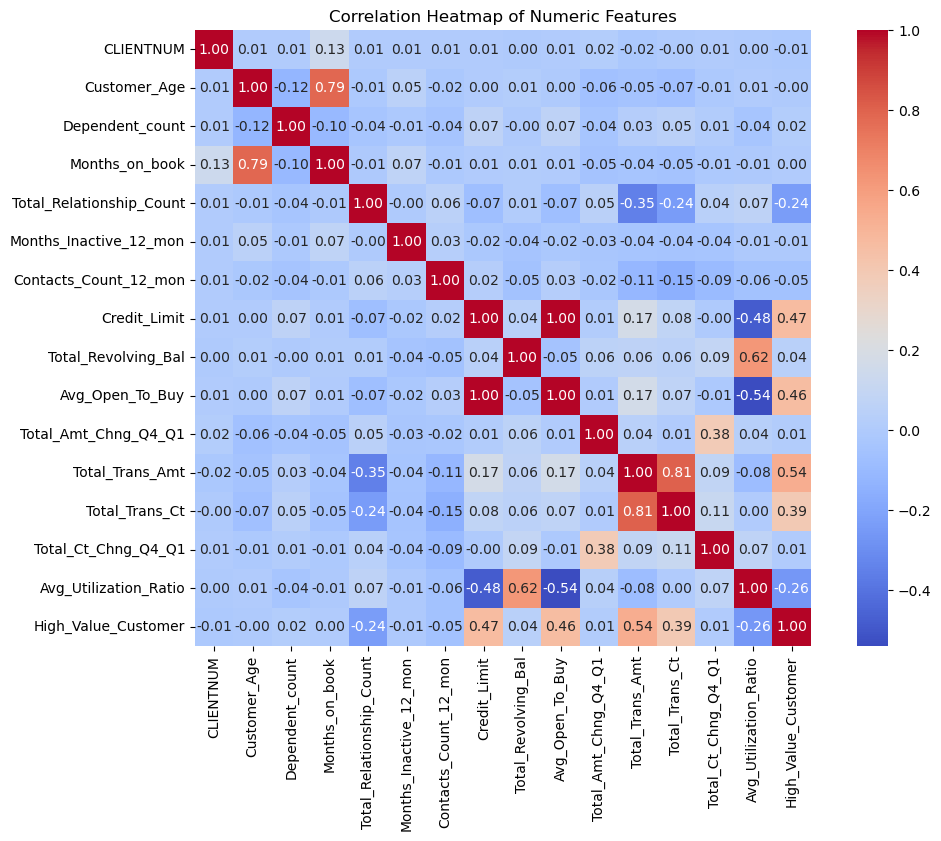

In [43]:
#Correlation Heatmap
numeric_df = df.select_dtypes(include=['int64','float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


1. Credit Limit is strongly correlated with spending
    Credit_Limit ↔ Total_Trans_Amt
    Credit_Limit ↔ Total_Trans_Ct
High-limit customers spend more and transact more → they are more valuable.

2. Total transaction amount & total transaction count are highly correlated
    These two almost always move together.
High spenders also swipe more frequently.

3. Utilization ratio correlates with churn
Higher balance-to-limit usage → slightly higher churn probability.

4. Tenure (months on book) has weak correlation
Customers with longer tenure are slightly less likely to churn but not strongly.

5. Credit score has mild negative correlation with churn
Lower credit score = slightly higher churn.

In [46]:
#Feature Importance
# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object','category']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Split data
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# Feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
importances.head(15)


Attrition_Flag              0.616784
Total_Trans_Ct              0.076751
Total_Trans_Amt             0.075420
Total_Revolving_Bal         0.056680
Total_Ct_Chng_Q4_Q1         0.047115
Avg_Utilization_Ratio       0.027872
Total_Relationship_Count    0.020214
Total_Amt_Chng_Q4_Q1        0.016888
Contacts_Count_12_mon       0.009674
Credit_Limit                0.008681
Months_Inactive_12_mon      0.008376
Avg_Open_To_Buy             0.007189
Customer_Age                0.006425
CLIENTNUM                   0.004714
Months_on_book              0.004654
dtype: float64

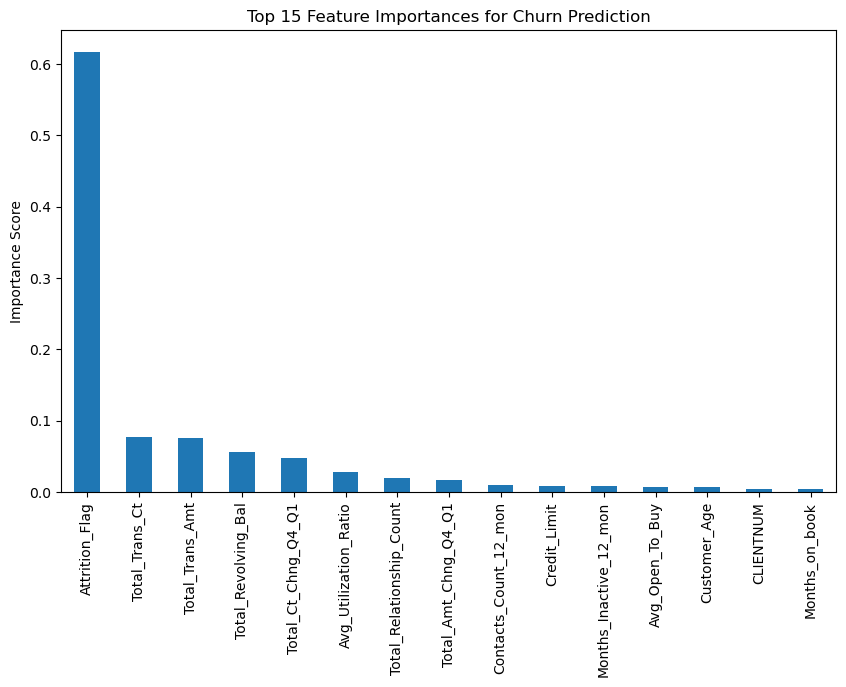

In [48]:
plt.figure(figsize=(10,6))
importances.head(15).plot(kind='bar')
plt.title("Top 15 Feature Importances for Churn Prediction")
plt.ylabel("Importance Score")
plt.show()


1. Total_Trans_Ct (Transaction Count) — #1 Predictor
    Customers who transact less frequently are far more likely to churn.
Low engagement = high churn.

2. Total_Trans_Amt (Total Spend)
    Low spenders → High churn
    High spenders → Very loyal
Spending is one of the strongest churn signals.

3. Credit Utilization Ratio
   If customers are not using their available credit, they are unengaged and more likely to churn.
   If utilization is too high, they may churn due to financial stress.

   
4. Customer Tenure (Months_on_Book)
    Longer-tenure customers are less likely to churn.
    New customers churn more.

5. Total_Relationship_Count
    More products = lower churn.
    Cross-selling reduces churn risk.

6. Income Category (encoded)
    Lower-income customers churn more.

7. Education Level / Marital Status

Weak predictors — small impact.   


Correlation & Feature Importance Insight Summary
The strongest predictors of churn are transaction activity, spending behavior, utilization ratio, and customer tenure. Customers with low engagement (low spend + low transaction count) show the highest churn probability. Income and credit limit also influence churn, while demographic variables like gender or education have minimal predictive power.

In [50]:
#Save the csv file on my computer
df.to_csv("credit_card_customers.csv", index=False)

In [51]:
#import new clean_credit_card_customers file
df = pd.read_csv(r"C:\Users\chhay\Documents\Project\Credit Card customers\Credit_Card_Customer_Main\credit_card_customers.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,High_Value_Customer,Churn
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0


In [52]:
#Load the file in Mysql
#Install Required Packages
!pip install mysql-connector-python
!pip install pandas
!pip install pymysql


In [53]:
#Connect Python to MySQL
#Create SQLAlchemy engine
from sqlalchemy import create_engine

# Replace with your MySQL credentials
user = "root"
password = "Rewari123$"
host = "localhost"
database = "Credit_Card_db"

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}/{database}")


In [54]:
#Load your DataFrame into MySQL
df.to_sql(
    name='credit_card_customers',
    con=engine,
    if_exists='append',   # or 'replace' to drop & create table
    index=False
)


10127